## Model Training

Here is the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:
- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)


### Importing the libraries

In [2]:
import os #Operating System and File Operations
import pandas as pd #Dataframe
import matplotlib.pyplot as plt #Plotting Graphs
import librosa #Audio Processing
import librosa.display #Displaying Audio processing
import numpy as np #Mathematical Operations
import IPython.display as ipd  # To play sound in the notebook

### RAVDESS

In [11]:
RAV = "./RAVDESS/Combined/"
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    part = i.split('.')[0].split('-')
    emotion.append(int(part[2]))
    temp = int(part[6])
    if temp%2 == 0:
        temp = "female"
    else:
        temp = "male"
    gender.append(temp)
    path.append(RAV + i )

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

labels
male_neutral       144
female_neutral     144
male_happy          96
female_happy        96
male_sad            96
female_sad          96
male_angry          96
female_angry        96
male_fear           96
female_fear         96
male_disgust        96
female_disgust      96
male_surprise       96
female_surprise     96
Name: count, dtype: int64

### CREMA-D

In [6]:
CREMA = "./CREMA-D/"
dir_list = os.listdir(CREMA)
dir_list.sort()

gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

labels
male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_sad        600
female_happy      600
male_neutral      575
female_neutral    512
Name: count, dtype: int64

### TESS

In [8]:
TESS = "./TESS/"
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [9]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

labels
female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: count, dtype: int64

### Concatination of all Dataframes

In [12]:
df = pd.concat([RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

labels
female_sad         1096
female_happy       1096
female_fear        1096
female_disgust     1096
female_angry       1096
female_neutral     1056
male_fear           767
male_sad            767
male_happy          767
male_angry          767
male_disgust        767
male_neutral        719
female_surprise     496
male_surprise        96
Name: count, dtype: int64


In [13]:
print(df)

              labels   source                                         path
0       male_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-01.wav
1     female_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-02.wav
2       male_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-03.wav
3     female_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-04.wav
4       male_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-05.wav
...              ...      ...                                          ...
7437  female_disgust    CREMA                ./CREMA-D/1091_WSI_DIS_XX.wav
7438     female_fear    CREMA                ./CREMA-D/1091_WSI_FEA_XX.wav
7439    female_happy    CREMA                ./CREMA-D/1091_WSI_HAP_XX.wav
7440  female_neutral    CREMA                ./CREMA-D/1091_WSI_NEU_XX.wav
7441      female_sad    CREMA                ./CREMA-D/1091_WSI_SAD_XX.wav

[11682 rows x 3 columns]


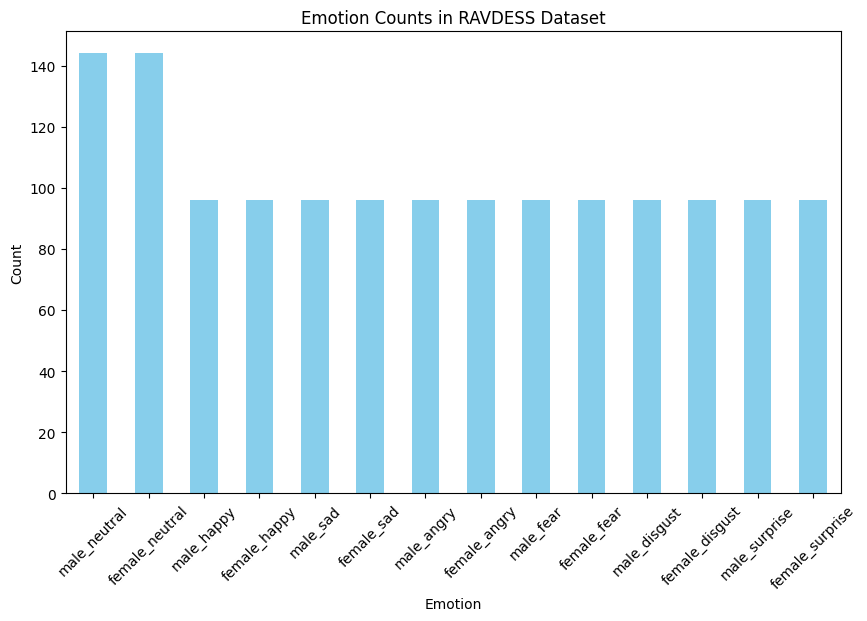

In [7]:
# Count the occurrences of each label
emotion_counts = RAV_df['labels'].value_counts()

# Plot the bar graph
emotion_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Emotion Counts in RAVDESS Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

We can see that the count of male_neutral and female_neutral is 144 each and happy ones are of 96 each.
Our main focus is on scoring positive when its neutral or positive. The score of other emotions such as sad, disgust, surprise will have a positive score but less value compared to positive and neutral ones.

The remaining one: anger and fear are to be considered negative.

Next Steps:
- Importing Librosa for spectrogram and wave: Done
- Audio Wave
- LOG MEL SPECTROGRAM
- Data Augmentation (Mainly adding noise and pitch to the dataset will be the main changes) (important)
- Feature Extraction
- Saving the features
- Data Preparation from the extracted features
- Choosing the appropiate model(will apply on 2-3 models)
- Checking their accuracy, precision and F-1 Score (accuracy target: > 60%)
- Final judgement for the model
- Saving and loading the standard model
- Audio segmentation and applying the model
- exporting visuals and tabluar data for the audio
- Creating a scoring model for the same

Waveplots - Waveplots let us know the loudness of the audio at a given time.
Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

<Figure size 1000x500 with 0 Axes>

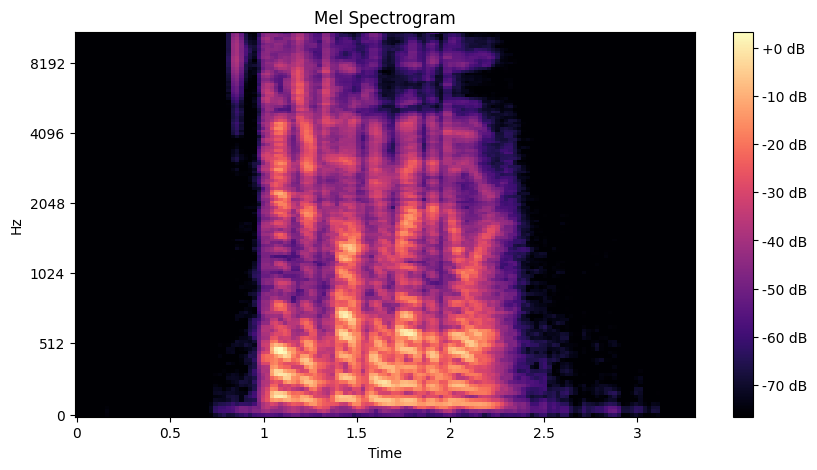

In [9]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
# Load an example audio file
data, sr = librosa.load(RAV_df.path[0])

# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')


In [4]:
import librosa
import numpy as np
import pandas as pd
import os

def extract_features_from_csv(csv_path, output_dir="features/"):
    if not os.path.exists(csv_path):
        print(f"Error: CSV file '{csv_path}' not found.")
        return

    os.makedirs(output_dir, exist_ok=True)

    data = pd.read_csv(csv_path)

    # Create empty dataframes for each feature
    mfcc_df = pd.DataFrame()
    chroma_df = pd.DataFrame()
    mel_spec_df = pd.DataFrame()
    contrast_df = pd.DataFrame()
    tonnetz_df = pd.DataFrame()
    zcr_df = pd.DataFrame()
    rmse_df = pd.DataFrame()

    for idx, row in data.iterrows():
        audio_file = row['path']
        emotion = row['labels']

        if not os.path.exists(audio_file):
            print(f"Warning: Audio file '{audio_file}' not found. Skipping...")
            continue

        try:
            audio, sr = librosa.load(audio_file, sr=None)
            print(f"Loaded audio file '{audio_file}' with sample rate {sr}.")

            # Feature 1: MFCCs
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            mfcc_mean = np.mean(mfcc, axis=1)
            mfcc_df = pd.concat([mfcc_df, pd.DataFrame([mfcc_mean], columns=[f"mfcc_{i+1}" for i in range(13)])], ignore_index=True)

            # Feature 2: Chroma
            stft = np.abs(librosa.stft(audio))
            chroma = librosa.feature.chroma_stft(S=stft, sr=sr)
            chroma_mean = np.mean(chroma, axis=1)
            chroma_df = pd.concat([chroma_df, pd.DataFrame([chroma_mean], columns=[f"chroma_{i+1}" for i in range(12)])], ignore_index=True)

            # Feature 3: Mel-Spectrogram
            mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
            mel_mean = np.mean(mel_spec, axis=1)
            mel_spec_df = pd.concat([mel_spec_df, pd.DataFrame([mel_mean], columns=[f"mel_{i+1}" for i in range(len(mel_mean))])], ignore_index=True)

            # Feature 4: Spectral Contrast
            contrast = librosa.feature.spectral_contrast(S=stft, sr=sr)
            contrast_mean = np.mean(contrast, axis=1)
            contrast_df = pd.concat([contrast_df, pd.DataFrame([contrast_mean], columns=[f"contrast_{i+1}" for i in range(contrast.shape[0])])], ignore_index=True)

            # Feature 5: Tonnetz
            tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sr)
            tonnetz_mean = np.mean(tonnetz, axis=1)
            tonnetz_df = pd.concat([tonnetz_df, pd.DataFrame([tonnetz_mean], columns=[f"tonnetz_{i+1}" for i in range(tonnetz.shape[0])])], ignore_index=True)

            # Feature 6: Zero Crossing Rate (ZCR)
            zcr = librosa.feature.zero_crossing_rate(audio)
            zcr_mean = np.mean(zcr)
            zcr_df = pd.concat([zcr_df, pd.DataFrame([[zcr_mean]], columns=["zcr_mean"])], ignore_index=True)

            # Feature 7: Root Mean Square Energy (RMSE)
            rmse = librosa.feature.rms(y=audio)
            rmse_mean = np.mean(rmse)
            rmse_df = pd.concat([rmse_df, pd.DataFrame([[rmse_mean]], columns=["rmse_mean"])], ignore_index=True)

        except Exception as e:
            print(f"Error processing '{audio_file}': {e}")

    # Add emotion column to each feature dataframe
    mfcc_df['emotion'] = data['labels']
    chroma_df['emotion'] = data['labels']
    mel_spec_df['emotion'] = data['labels']
    contrast_df['emotion'] = data['labels']
    tonnetz_df['emotion'] = data['labels']
    zcr_df['emotion'] = data['labels']
    rmse_df['emotion'] = data['labels']

    # Save each feature-specific dataframe to a separate CSV
    mfcc_df.to_csv(os.path.join(output_dir, "mfcc_features.csv"), index=False)
    chroma_df.to_csv(os.path.join(output_dir, "chroma_features.csv"), index=False)
    mel_spec_df.to_csv(os.path.join(output_dir, "mel_spectrogram_features.csv"), index=False)
    contrast_df.to_csv(os.path.join(output_dir, "spectral_contrast_features.csv"), index=False)
    tonnetz_df.to_csv(os.path.join(output_dir, "tonnetz_features.csv"), index=False)
    zcr_df.to_csv(os.path.join(output_dir, "zcr_features.csv"), index=False)
    rmse_df.to_csv(os.path.join(output_dir, "rmse_features.csv"), index=False)

    print(f"\nFeature extraction complete! Feature CSVs saved in '{os.path.abspath(output_dir)}' directory.")

csv_path = "RAVDESS.csv" 
extract_features_from_csv(csv_path)

Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-01.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-02.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-03.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-04.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-05.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-06.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-07.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-08.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-09.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-10.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-11.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Com